<a href="https://colab.research.google.com/github/DrMelissaFranklin/DrMelissaFranklin/blob/main/Mel_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 – To Do List



## Problem Definition

This project uses data consisting of customer features and whether or not that customer made a transaction.

The goal is to create a model that can predict whether or not a future customer will make a transaction based on the same customer features.

The features of the customers have been anonymized, so there is no intuition available to help judge which variables might be more important.  This helps to assure that all variables will be considered equally in the model.

Whether or not a transaction occurred is a binary known event, and is a known target for the model.  Hence, this is a supervised binary classification datascience problem.   

Because we have binary classification as the target, this project will use Gaussian Naive Bayes classification modeling.

The data is available on AWS S3 at https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv



## Data Collection

Load the Application Programming Interfaces, API's, libraries developed in python code.  

Gemini defines an API, or Application Programming Interface, as:
"a set of rules and specifications that allows different software programs to communicate with each other. It acts as an intermediary between two applications, enabling them to exchange data and functionality."

An example from Gemini, paraphrased here, is:
At a restaurant, you (an application, i.e., python) tell a waiter (the API, i.e., pandas) what you want from the menu (another application with a service associated with it, i.e., a function / method). The waiter (API) relays your order (python app) to the kitchen (cooks a meal listed on the menu, i.e., creates a graphic / calculates / changes the dataset), and brings you back your food (the result of the menu order, or function/method).



In [45]:
import matplotlib.pyplot as plt #Load MATLAB-like plotting
import numpy as np              #Load scientific computing
import pandas as pd             #Load dataframe methods
import plotly.express as px     #Load interactive chart visuals
import seaborn as sns           #Load plots pandas dataframes
            # Load SciKit machine learning / modeling methods:
from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [46]:
#Load data Train.csv from AWS (amazon web services) by pointing to the database in AWS.
url = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'
df = pd.read_csv(url) # Change the csv (comma-separated values), which has very limited data manipulation capability, to a DataFrame built by pandas for extensive data manipulation capability.

## Pre-Exploratory Data

Examine the data using tools used in class.  Compare different results across the different tools, the results are not always the same.




In [47]:
df #180000 rows × 53 columns displayed as the Table option

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


In [48]:
df.shape #180,000 row and 53 columns

(180000, 53)

In [49]:
df.info() #180000 rows × 53 columns, dtypes: float64(50), int64(2), object(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

In [50]:
df.head()
#rows show as train_# beginning at 'train_0'
#columns are 53 and with most named var_# beginning at 'var_0'
#Potential columns that could be identifiers are also showing as 'Unnamed', 'ID_code', and 'target'

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [51]:
df.tail() # rows end at 'train_179999', columns end at 'var_49'

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


In [52]:
df.describe() #180000 rows, columns at 52(later we see this has excluded ID_code) min and max appear to be the rows/observations here not values(?), std seems large.

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,89999.500000,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,51961.668564,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,44999.750000,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,89999.500000,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,134999.250000,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,179999.000000,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100


In [53]:
df.columns # list of all 53 column names

Index(['Unnamed: 0', 'ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3',
       'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10',
       'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17',
       'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24',
       'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31',
       'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38',
       'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45',
       'var_46', 'var_47', 'var_48', 'var_49'],
      dtype='object')

## Locate columns that may not be needed for analysis, such as identifier columns.

In [54]:
#Look for unique values, and whether a column name contains the exact same number as there are rows -- indicating that they are likely to be identifiers
df['Unnamed: 0'].unique()
# Results show 1 to 179,999 rows or 180,000, so Unnamed appears to be an identifier.

array([     0,      1,      2, ..., 179997, 179998, 179999])

In [55]:
#Confirm unique values are the same number as rows, hence, an identifier variable
df['Unnamed: 0'].value_counts()
#The results show 180,000 rows, reaffirming Unnamed as an identifier

,count
Unnamed: 0,
0,1
120003,1
119995,1
119996,1
119997,1
...,...
60001,1
60002,1
60003,1


In [56]:
df.nunique().sort_values(ascending=False)
#Nunique is a pandas method, Unnamed shows again as equal to number of rows, ID_code is also equal to number of rows

,0
Unnamed: 0,180000
ID_code,180000
var_35,137280
var_45,134537
var_13,131746
var_21,130573
var_8,130208
var_7,129702
var_17,129453
var_33,128142


In [57]:
#Data types were already viewed using .info()
df.dtypes
df.dtypes.sort_values()
#The results are again that var_# are the features with float values; and that ID_Code is an object, while Unnamed and target are int.

,0
Unnamed: 0,int64
target,int64
var_26,float64
var_27,float64
var_28,float64
var_29,float64
var_30,float64
var_31,float64
var_32,float64
var_33,float64


In [58]:
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")
    #Column target is assymetric, number of 0's is 161960, number of 1 is 18040

Column: Unnamed: 0
Unnamed: 0
0         1
120003    1
119995    1
119996    1
119997    1
         ..
60001     1
60002     1
60003     1
60004     1
179999    1
Name: count, Length: 180000, dtype: int64


Column: ID_code
ID_code
train_0         1
train_120003    1
train_119995    1
train_119996    1
train_119997    1
               ..
train_60001     1
train_60002     1
train_60003     1
train_60004     1
train_179999    1
Name: count, Length: 180000, dtype: int64


Column: target
target
0    161960
1     18040
Name: count, dtype: int64


Column: var_0
var_0
13.0656    11
10.7369    10
11.9590    10
9.8379     10
11.6976    10
           ..
18.1861     1
12.7737     1
5.1913      1
12.0232     1
15.7964     1
Name: count, Length: 90443, dtype: int64


Column: var_1
var_1
-2.1515    10
-2.4313     9
-1.4517     9
-6.0564     9
-1.1853     9
           ..
-1.2680     1
 4.9420     1
 5.4443     1
-1.4868     1
 7.1923     1
Name: count, Length: 103081, dtype: int64


Column: var_2
var_2

In [59]:
df.groupby('ID_code').min()
#negative values exist

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
train_1,1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
train_10,10,0,5.0702,-0.5447,9.5900,6.0382,7.3198,13.9059,9.0796,17.4442,...,5.7487,0.4344,-3.5162,27.1062,3.9860,22.4111,7.2780,8.0819,0.2139,14.2914
train_100,100,0,9.4702,-4.0205,9.3693,6.0796,8.4994,14.0169,2.4072,6.2022,...,6.1723,2.8400,-8.4584,31.0026,7.5300,4.1589,2.7162,6.3275,3.8694,12.1681
train_1000,1000,0,8.5826,-8.3369,10.1053,4.6452,7.9352,13.6579,4.6240,29.8587,...,5.1851,0.0764,-0.6448,16.3635,1.1378,12.9741,2.0163,9.2570,0.9863,17.7495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_99995,99995,0,7.5506,-2.1141,16.4580,4.9651,7.8092,13.9346,6.8317,23.8078,...,6.0137,0.8976,4.8383,19.2594,-0.6226,18.5654,12.3250,5.2121,-0.6436,15.1972
train_99996,99996,0,8.3028,-2.2482,9.0411,4.6836,8.8638,13.7295,12.4434,15.1691,...,5.2958,1.7977,-0.3250,23.4120,1.0397,0.3338,-1.8195,6.9932,2.3224,14.3243
train_99997,99997,0,11.6311,3.4519,9.8680,5.4823,9.6739,14.1703,14.0091,25.1650,...,5.1955,-4.4160,2.1202,25.7654,4.3910,16.0005,0.8846,6.1457,4.3616,21.0496


In [60]:
df.groupby('ID_code').max()
#large positive values exist

,Unnamed: 0,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
train_1,1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
train_10,10,0,5.0702,-0.5447,9.5900,6.0382,7.3198,13.9059,9.0796,17.4442,...,5.7487,0.4344,-3.5162,27.1062,3.9860,22.4111,7.2780,8.0819,0.2139,14.2914
train_100,100,0,9.4702,-4.0205,9.3693,6.0796,8.4994,14.0169,2.4072,6.2022,...,6.1723,2.8400,-8.4584,31.0026,7.5300,4.1589,2.7162,6.3275,3.8694,12.1681
train_1000,1000,0,8.5826,-8.3369,10.1053,4.6452,7.9352,13.6579,4.6240,29.8587,...,5.1851,0.0764,-0.6448,16.3635,1.1378,12.9741,2.0163,9.2570,0.9863,17.7495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train_99995,99995,0,7.5506,-2.1141,16.4580,4.9651,7.8092,13.9346,6.8317,23.8078,...,6.0137,0.8976,4.8383,19.2594,-0.6226,18.5654,12.3250,5.2121,-0.6436,15.1972
train_99996,99996,0,8.3028,-2.2482,9.0411,4.6836,8.8638,13.7295,12.4434,15.1691,...,5.2958,1.7977,-0.3250,23.4120,1.0397,0.3338,-1.8195,6.9932,2.3224,14.3243
train_99997,99997,0,11.6311,3.4519,9.8680,5.4823,9.6739,14.1703,14.0091,25.1650,...,5.1955,-4.4160,2.1202,25.7654,4.3910,16.0005,0.8846,6.1457,4.3616,21.0496


## Data Cleaning

If there are data cleaning issues, develop recommendations for how to deal with them.



In [61]:
dfc = df.copy()

In [62]:
dfc.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [63]:
#drop the columns that are not needed for analyses, the identifiers
dfc.drop('Unnamed: 0', axis=1, inplace=True)

In [64]:
#drop the columns that are not needed for analyses, the identifiers
dfc.drop('ID_code', axis=1, inplace=True)

In [65]:
dfc.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


In [66]:
dfc.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.00000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,0.100222,10.678650,-1.630045,10.712922,5.408688,7.566953,14.024017,8.52808,15.243424,17.264876,...,5.635897,-0.000418,-0.668334,20.208845,2.595090,12.756574,3.236201,7.440715,1.927078,15.870166
std,0.300297,3.041036,4.050519,2.639146,0.866265,1.235043,0.190038,4.64170,7.851050,8.203204,...,0.369629,4.422915,5.968300,7.132446,2.801692,9.320939,4.561317,3.021636,1.476777,3.010492
min,0.000000,0.408400,-15.043400,2.117100,2.347300,3.970500,13.434600,-6.01110,-10.664200,-10.089000,...,4.258800,-14.506000,-22.748700,-2.995300,-7.856100,-18.489700,-14.093300,-2.691700,-3.814500,6.299300
25%,0.000000,8.451675,-4.745600,8.720000,4.768500,6.618800,13.893900,5.06575,9.170200,11.552000,...,5.374200,-3.253575,-4.997500,15.062900,0.628600,5.661300,-0.062000,5.160325,0.890000,13.830400
50%,0.000000,10.526750,-1.611250,10.579600,5.385600,7.628500,14.025500,8.59920,15.198900,17.246850,...,5.634500,0.008500,-0.560300,20.203300,2.513800,12.520300,3.204650,7.350950,1.899700,15.934600
75%,0.000000,12.756200,1.360225,12.514100,6.003200,8.583800,14.164400,12.27330,21.010500,23.100050,...,5.905600,3.098325,3.632525,25.639125,4.396725,19.461725,6.409900,9.511125,2.947225,18.061425
max,1.000000,20.315000,10.376800,19.353000,8.447700,11.150600,14.654500,22.33150,41.748000,49.044300,...,7.089000,16.731900,18.855400,43.546800,13.448700,44.363400,18.440900,16.716500,8.402400,26.079100


In [67]:
# Find the Nan
sums = dfc.isna().sum()
sums
#There are zero Nan

,0
target,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0
var_5,0
var_6,0
var_7,0
var_8,0


In [68]:
dfcc = dfc.copy() #DataFrame, copied and cleaned
dfcc

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,22.3368,11.4176,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,16.0279,15.7685,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,15.2717,7.7995,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,20.4504,29.9869,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760


## Exploratory Data Analysis

Produce some visual analysis of the data – like plots showing the distributions of all variables. Recall that Gaussian Naive Bayes assumes the predictors are normally distributed. Note: you might have to do multiple plots in groups.

NOTE: the ‘target’ column indicates a successful transaction (‘1’) or a no-transaction (‘0’). Verify these are the only values in that column.





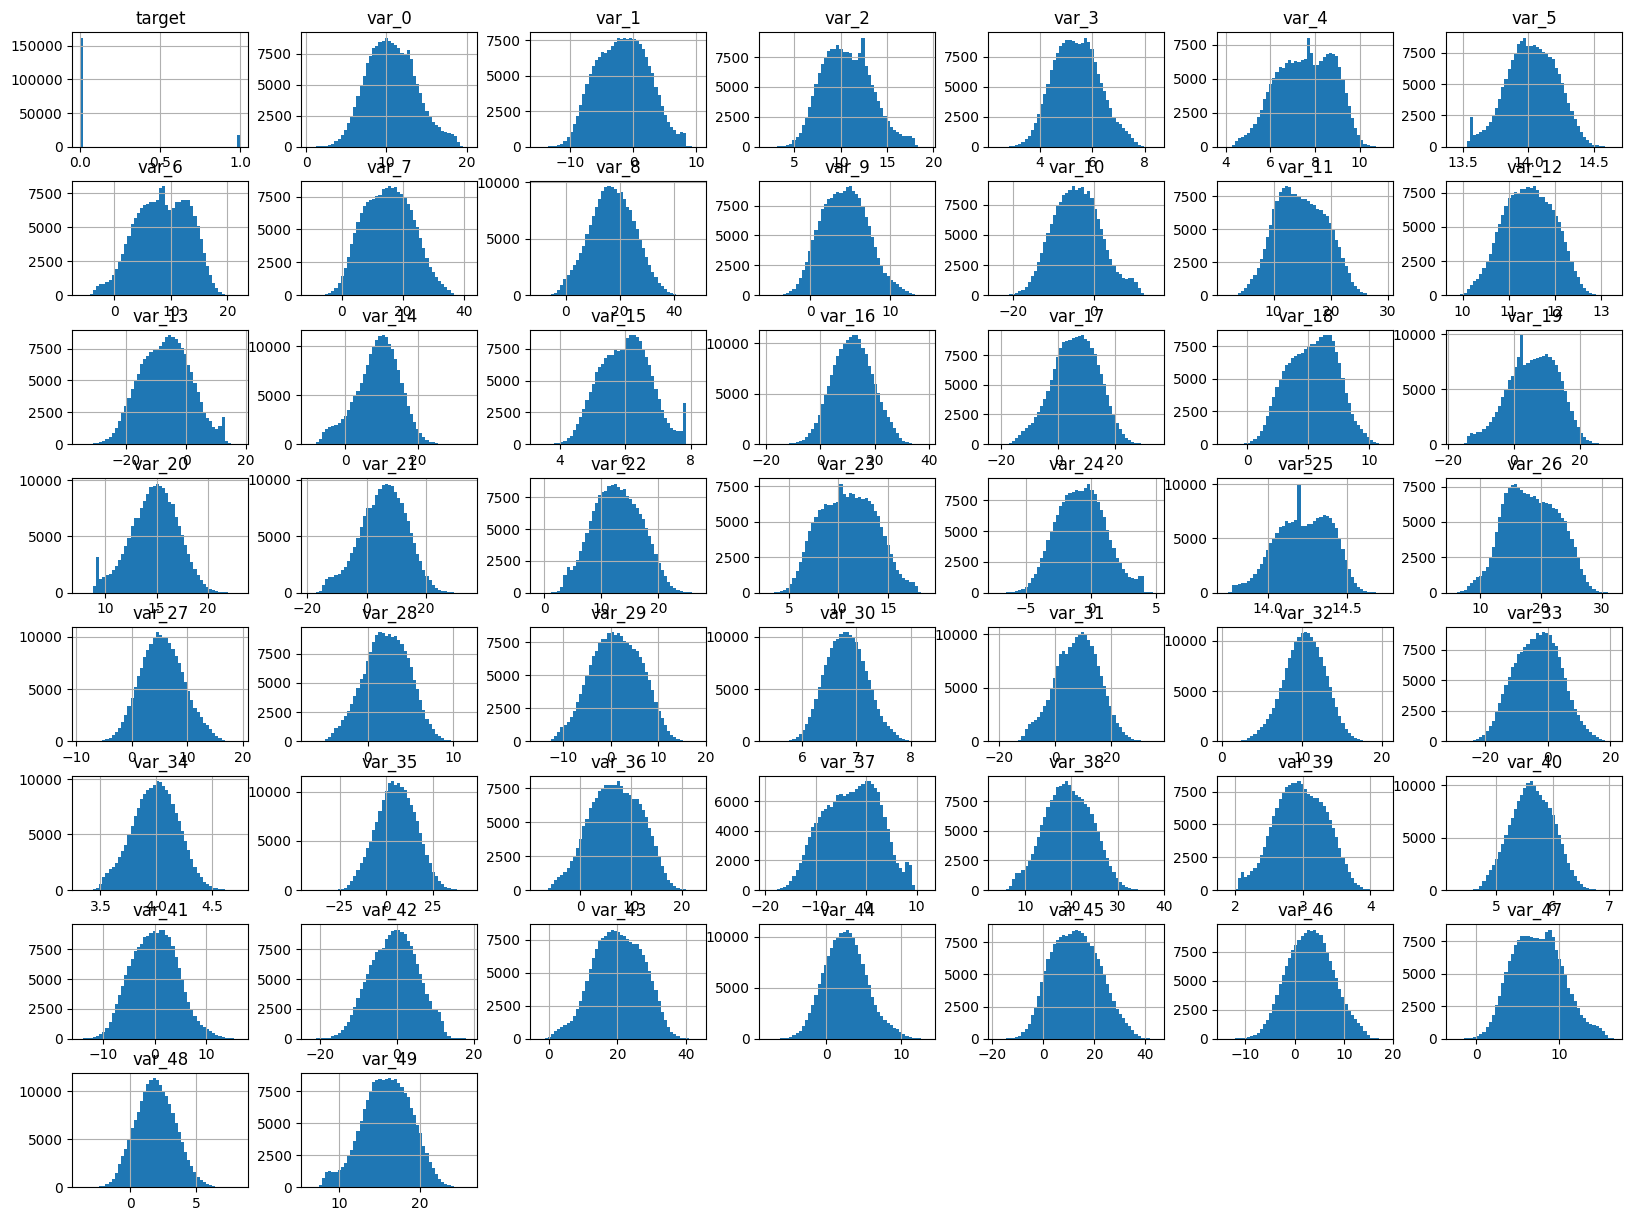

In [69]:
dfcc.hist(bins=51, figsize=(20,15))
plt.show()


Check the correlation values between all **predictor columns** to ensure there are no substantial correlations between predictors. This is important to support the decision to classify the ‘target’ using Naïve Bayes.





In [70]:
# absolute value of corrolation
#corr = corr.iloc[0]
#corr.abs().sort_values(ascending = False)
#None of the correlations are significant, essentially equal to zero with the strongest being variable 20 at .08

In [71]:
re = np.random.RandomState(0) #randomize

corr = dfcc.corr() #correlation matrix of copied and cleaned dataframe
corr.style.background_gradient(cmap='coolwarm') #colorize

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
target,1.000000,0.052904,0.049916,0.055450,0.066924,-0.042073,-0.070015,-0.054375,0.044769,-0.057378,0.059227,0.063565,-0.045516,-0.052324,0.049072,-0.048623,0.062887,0.045281,-0.059906,0.048392,-0.057320,-0.080689,-0.040311,-0.046433,0.047569,0.059306,-0.047005,-0.050278,0.064868,-0.049551,-0.041987,0.052457,-0.073296,-0.063871,0.040520,-0.053733,-0.048198,-0.045513,0.040147,-0.055704,-0.057373,-0.050049,0.047948,0.041593,-0.061291,0.051110,0.047543,0.056902,0.045506,-0.042765,-0.051718
var_0,0.052904,1.000000,-0.002155,0.006632,0.007155,-0.002247,-0.003147,-0.001717,0.004266,0.000289,0.002817,0.006102,-0.003080,-0.003419,0.006984,-0.003111,-0.000807,0.002762,-0.007308,0.003033,-0.003159,-0.007543,-0.000473,0.000999,0.002101,0.004061,-0.003717,-0.004076,0.006209,-0.000320,-0.000785,0.002141,-0.006605,0.000216,0.001071,-0.001549,-0.003448,-0.002529,-0.000680,-0.002785,-0.008580,-0.002602,0.002043,0.001072,-0.001493,0.003662,-0.000227,0.002330,-0.000037,-0.005759,-0.005945
var_1,0.049916,-0.002155,1.000000,0.005644,0.002640,-0.000408,-0.002629,-0.001234,-0.000374,-0.000378,0.001282,0.004161,0.000955,-0.003251,0.001400,-0.005702,0.004442,0.002061,-0.003249,0.002386,-0.009469,-0.002229,-0.003555,0.000353,0.003639,0.004988,-0.001364,-0.000936,0.002923,-0.007531,-0.003454,0.002295,0.001009,-0.004563,0.002160,-0.001535,-0.003538,0.000531,0.003900,0.002074,-0.007379,-0.003109,0.001891,0.003331,-0.005291,0.000805,0.000387,0.005835,0.003845,-0.003810,-0.005352
var_2,0.055450,0.006632,0.005644,1.000000,0.000679,-0.001293,-0.002718,-0.009171,0.003436,-0.006433,0.000511,0.006676,0.001006,-0.006361,0.000502,0.001173,0.000238,-0.002321,-0.008054,0.003295,-0.008065,-0.003277,-0.004516,-0.001183,-0.002632,0.005903,-0.000660,-0.000789,0.004149,-0.002385,-0.003774,0.000987,-0.002583,-0.003880,0.001614,-0.000990,-0.005730,-0.005019,-0.000033,-0.003032,-0.008062,-0.004639,0.002059,0.000459,-0.005709,0.001388,0.004021,-0.000657,0.000968,-0.002388,-0.000372
var_3,0.066924,0.007155,0.002640,0.000679,1.000000,-0.006768,-0.002568,-0.005282,0.002685,-0.004835,0.002293,0.003590,0.000116,-0.003659,0.000999,-0.006827,0.003167,0.001771,-0.003353,0.005542,-0.008879,-0.003882,-0.005799,-0.004269,0.001711,0.005080,-0.002887,-0.001757,0.003192,-0.004857,-0.000245,0.002256,-0.003911,-0.001359,-0.004274,-0.006517,-0.002966,-0.003190,0.001802,0.001561,-0.003894,-0.004825,0.002188,-0.000344,-0.005121,-0.000999,0.003463,0.000276,0.005311,-0.001109,-0.002987
var_4,-0.042073,-0.002247,-0.000408,-0.001293,-0.006768,1.000000,0.000845,0.000210,-0.001267,0.000962,-0.005332,-0.003446,0.003206,0.003278,-0.000803,0.001561,-0.001129,-0.003054,-0.000039,-0.002726,0.002086,0.000842,0.001610,0.001980,-0.007927,-0.003609,0.004553,0.002389,-0.002513,0.001646,0.002574,-0.002446,0.000657,-0.000499,-0.002492,0.004187,0.002901,0.002981,0.001161,0.004357,0.004569,-0.000824,-0.000685,-0.004266,0.000483,-0.003563,-0.004458,0.000043,-0.000716,0.000190,0.001484
var_5,-0.070015,-0.003147,-0.002629,-0.002718,-0.002568,0.000845,1.000000,0.004778,0.000110,0.005587,-0.004708,-0.006633,0.008232,0.003767,-0.004156,-0.001322,-0.004501,-0.000761,0.005801,-0.005806,0.007575,0.005668,0.002973,0.006521,-0.003263,-0.009386,0.003363,0.005223,-0.004910,0.002953,0.002366,-0.003349,0.004910,0.008401,0.000237,0.006401,0.003790,0.002574,-0.002633,0.004442,0.007981,0.007054,-0.000356,-0.006139,0.004441,-0.005371,-0.002999,0.001721,-0.004525,0.003204,0.008009
var_6,-0.054375,-0.001717,-0.001234,-0.009171,-0.005282,0.000210,0.004778,1.000000,0.001922,0.001879,0.000293,-0.007201,0.002331,0.005578,-0.004100,0.007995,-0.000941,-0.004249,0.001999,-0.003728,0.003756,0.00550

In [72]:
print(dfcc['target'].unique())  # Check for number of unique values
print(dfcc['target'].value_counts())  # Count occurrences of each value; NOTE the assymetry

[0 1]
target
0    161960
1     18040
Name: count, dtype: int64


Create two data frames: one with all successful transactions, one with all unsuccessful transactions. **Make sure they are copies and not slices**.


In [73]:
dfccc = dfcc.copy()
dfccc.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


## Data Processing

Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.



In [74]:
# Create two dataframes for the target values 0 and 1

# This is the DataFrame for target = 0 (failed transactions)
df_fail = dfccc[dfccc['target'] == 0].copy()

# This is the DataFrame for target = 1
df_succ= dfccc[dfccc['target'] == 1].copy()

print(df_fail.shape)
print(df_succ.shape)

# Now df_Fail and df_Succ are independent copies

(161960, 51)
(18040, 51)


In [75]:
df_predictors = dfccc.drop( columns = [ "target" ] ) #drop target because it's not a predictor, of course
df_target = dfccc[ "target" ] #target is the variable of interest, successful transactions

print(df_predictors.shape)
print(df_target.shape)

# New df_predictors and df_target are independent copies

(180000, 50)
(180000,)



Define a Gaussian Naïve Bayes model using Sklearn.



In [76]:
#Gaussian Naive Bayes (GNB):

# Separate features and targets (big X is DV and little y are IV's)
X = df_predictors # This assigns all columns for the independent variables / features that predict the target behavior to X.
y = dfccc.loc[df_predictors.index, 'target'] # This assignes the target column to y.

# Split the data into training and testing sets for X and y as defined above.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # The test size sets up the number of observations at 80% of the x, and 80% of the y.

# This runs the training for the Gaussian Naive Bayes model:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [77]:
# This sets up the predictions in the test set.
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the model:
metrics.accuracy_score(y_test, y_pred)

0.9088611111111111

In [ ]:
numLoops = 50 # Repeat 50 times the comparison of the predictions to the real observations to test the accuracy of fit for the GNB model.

accuracy_scores = np.zeros(numLoops) # Define the variable accuracy_scores.

for idx in range(0, numLoops): # Set up the range
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #use the train_test_split function to pull observations for each loop through the model.
  gnb.fit(X_train, y_train) # This evoked the Guassian Naive Bayes model being tested.
  y_pred = gnb.predict(X_test) # This defines our predicted values.
  accuracy_scores[idx] = metrics.accuracy_score(y_test, y_pred) #This indexes the test and predicted y values for the model
accuracy_scores.mean()  # This computes the mean 'accuracy' for how well the GNB mocel fits the data.

In [ ]:
plt.hist(accuracy_scores) # Visual the disctribution of accuracy scores in a histogram.
plt.show()

In [ ]:
#Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report).
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()
print("Confusion Matrix:")
print(confusion_matrix)
#The results show each possible quadrants. Qudrant 0,0 and 1,0 -- for every failed transaction there were 32,108 that were predicted to be failed and were, while there were 393 that were failed but were incorrectly predicted to be successful.  For Quadrant 0,1 there were 2713 failed but were actually predicted to be successful while in 1,1 there were 786 predicted to be successful that were successful.

In [ ]:
classification_report = metrics.classification_report(y_test, y_pred) # This report shows the proportion of recall to precision as an F1 score, a ratio that helps confirm the precision of the confusions matrix on the fit of the model.
print(classification_report)

In [ ]:
equalize_df = df_predictors.copy() #This step re-balances the assymmetry in the data where there are 18,040 1's (successful transactions) and over 160,000 0's (failed transactions).  This will create an equal 50/50 dataset.
equalize_df.head()

In [ ]:
for idx in range(0, numLoops): # Repeat 50 times the comparison of the predictions to the real observations to test the accuracy of fit for the GNB model AFTER the dataset number of observations are equalized.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
  gnb.fit(X_train, y_train)
  y_pred = gnb.predict(X_test)
  accuracy_scores[idx] = metrics.accuracy_score(y_test, y_pred)
accuracy_scores.mean()
# The resulting percentage is below, and is slighly different than the above  accuracy mean.

In [ ]:
plt.hist(accuracy_scores). # A histogram of the performance of the model is shown.
plt.show()

In [ ]:
# This is the new new confusion matrix after equalizing the sizes of the target datasets, failed vs successful transactions.  The numbers are slightly improved for the accuracy of the 1's (successful transactions) especially.
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d')
plt.show()
print("Confusion Matrix:")
print(confusion_matrix)

In [ ]:
classification_report = metrics.classification_report(y_test, y_pred) # After equalizing the numbers for predicted and actual observations we see compared to the non-equalized numbers that the precision is a little higher with a macro average and weighted average sitting 1% lower for accuracy.  The primary improvement is with the 1's F-score, moving from .34 to .35             precision    recall  f1-score   support

#           0       0.92      0.99      0.95     32501
#           1       0.67      0.22      0.34      3499

#    accuracy                           0.91     36000
#   macro avg       0.79      0.61      0.64     36000
#weighted avg       0.90      0.91      0.89     36000
print(classification_report)

## Results

This project used data consisting of customer features and whether or not that customer made a transaction.

The goal was to create a model that would predict whether or not a future customer would make a transaction based on the same customer features.

The features of the customers have been anonymized, so there was no intuition available to help judge which variables might be more important. This assured that all variables were considered equally in the model.

Whether or not a transaction occurred was a binary known event, and was used as the known target for the model. Hence, this was a supervised binary classification datascience problem and used Gaussian Naive Bayes classification modeling.

The data was greatly skewed with about 90% failed vs about 10% successful transactions, so the data was equalized to create 50/50 datasets to test the model more accurately.  This did improve the accuracy in the 1's 'hit rate' especially.  None of the independent variables, that is the features or predictors of transaction success, were correlated with each other.

